In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from tqdm.notebook import tqdm

In [2]:
with open(f"../intermediate_files/all_df.pkl", "rb") as f:
    all_df = pickle.load(f)
print(f"{all_df.shape=}")

# this only includes predictions for events passing the preselection used during training
with open(f"../training_outputs/first_multiclass_training/predictions.pkl", "rb") as f:
    pred_df = pickle.load(f)
print(f"{pred_df.shape=}")

merged_df = pd.merge(all_df, pred_df, on=["filetype", "run", "subrun", "event"], how="left")

sig_categories = ['1gNp', '1g0p', '1gNp1mu', '1g0p1mu', '1g_outFV', 
                  '2gNp', '2g0p', '2gNp1mu', '2g0p1mu', '2g_outFV', 
                  '0g', '3plusg', 'dirt', 'ext']

prob_categories = ["prob_" + cat for cat in sig_categories]

for prob in prob_categories:
    merged_df[prob] = merged_df[prob].fillna(-1)

num_train_events = len(merged_df.query("used_for_training == True"))
num_test_events = len(merged_df.query("used_for_testing == True"))
frac_test = num_test_events / (num_train_events + num_test_events)
print(f"weighting up by the fraction of test events: {frac_test:.3f}")

modified_net_weights = []
used_for_testing = merged_df["used_for_testing"].to_numpy()
wc_net_weights = merged_df["wc_net_weight"].to_numpy()
for i in range(len(merged_df)):
    if used_for_testing[i]:
        modified_net_weights.append(wc_net_weights[i] / frac_test)
    else:
        modified_net_weights.append(wc_net_weights[i])
merged_df["wc_net_weight"] = modified_net_weights         

merged_df = merged_df.query("used_for_testing == True")

print(f"{merged_df.shape=}")
presel_merged_df = merged_df.query("wc_kine_reco_Enu > 0 and wc_shw_sp_n_20mev_showers > 0")
print(f"{presel_merged_df.shape=}")

presel_merged_df


all_df.shape=(747332, 66)
pred_df.shape=(71178, 20)
weighting up by the fraction of test events: 0.500
merged_df.shape=(35589, 82)
presel_merged_df.shape=(24065, 82)


,run,subrun,event,filetype,wc_net_weight,topological_signal_category,physics_signal_category,wc_nue_score,wc_numu_score,wc_nc_delta_score,...,prob_2gNp,prob_2g0p,prob_2gNp1mu,prob_2g0p1mu,prob_1g_outFV,prob_2g_outFV,prob_0g,prob_3plusg,prob_dirt,prob_ext
0,20290,30,1510,nc_pi0_overlay,0.853012,2gNp,NC1pi0_Np,-15.000000,-0.445759,-3.342609,...,0.944316,0.012887,1.939894e-02,2.282868e-05,0.000013,1.762621e-05,0.006040,0.002404,4.051858e-05,0.005249
1,20290,30,1521,nc_pi0_overlay,0.853012,2gNp,NC1pi0_Np,-8.405992,-0.906318,-6.305526,...,0.968448,0.003051,7.341531e-03,4.147832e-06,0.000004,1.541762e-05,0.000262,0.002144,6.533629e-07,0.001253
4,20290,30,1543,nc_pi0_overlay,0.853012,2g0p,NC1pi0_0p,-9.779932,-1.000641,-7.236095,...,0.089629,0.874161,2.223498e-02,1.871407e-04,0.000149,8.101316e-04,0.003184,0.001730,5.785138e-05,0.006017
5,20290,30,1544,nc_pi0_overlay,0.853012,2gNp,NC1pi0_Np,-15.000000,-0.130912,1.638694,...,0.923344,0.027177,1.363644e-03,1.890208e-05,0.000117,2.881535e-05,0.031806,0.001553,7.708088e-05,0.001998
7,20672,75,3754,nc_pi0_overlay,0.853012,2gNp,NC1pi0_Np,-13.695713,-0.727442,-3.236898,...,0.520390,0.418245,2.889775e-02,3.811315e-05,0.001599,1.859842e-04,0.001898,0.000334,1.970582e-04,0.021169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745925,21127,121,6058,ext,15.323285,ext,ext,-15.000000,-0.032794,-3.114151,...,0.000161,0.000050,3.196191e-05,5.289627e-07,0.000043,5.002764e-08,0.031518,0.000002,5.982766e-04,0.967501
746371,20423,551,27581,ext,15.323285,ext,ext,-15.000000,-0.938013,-1.905209,...,0.007844,0.175129,6.537586e-04,4.100300e-06,0.000039,2.133688e-05,0.178338,0.000034,3.507084e-01,0.212352
746558,20194,192,9622,ext,15.323285,ext,ext,-15.000000,-3.454599,-4.554944,...,0.000395,0.000179,3.773692e-07,4.059885e-07,0.000007,5.814323e-06,0.000631,0.000008,5.558229e-04,0.996964
746934,20154,269,13456,ext,15.323285,ext,ext,-15.000000,-0.014429,-5.872269,...,0.002773,0.018757,4.403330e-04,1.224039e-05,0.000016,3.093149e-07,0.361572,0.000023,3.486222e-04,0.615344


# 1g and 2g

In [3]:
probs_2d_arr = presel_merged_df[prob_categories].to_numpy()

reco_categories_argmax = np.argmax(probs_2d_arr, axis=1)

presel_merged_df["reco_category_argmax_index"] = reco_categories_argmax


/var/folders/yg/3cj9svrx2kz3bpv_6thtt7x00000gn/T/ipykernel_24105/4263806371.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  presel_merged_df["reco_category_argmax_index"] = reco_categories_argmax


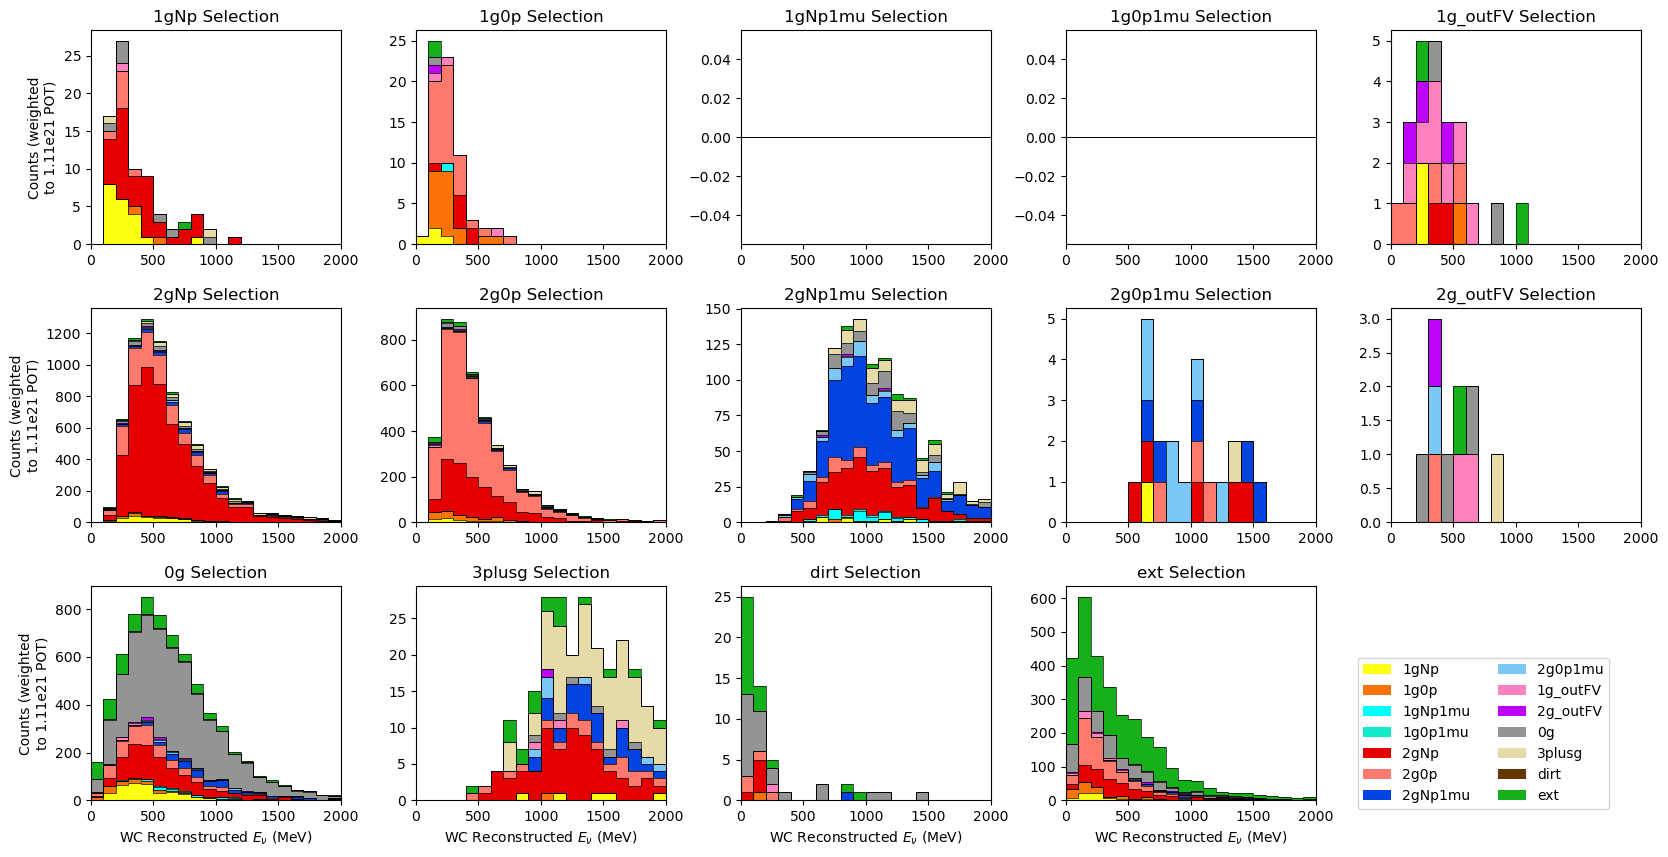

In [4]:
queries = []
for i, signal_category in enumerate(sig_categories):
    queries.append(f"reco_category_argmax_index == {i}")

breakdown_dic = {
    '1gNp': "xkcd:yellow",
    '1g0p': "xkcd:orange", 
    '1gNp1mu': "xkcd:cyan",
    '1g0p1mu': "xkcd:aqua",
    '2gNp': "xkcd:red",
    '2g0p': "xkcd:salmon",
    '2gNp1mu': "xkcd:blue",
    '2g0p1mu': "xkcd:lightblue",
    '1g_outFV': "xkcd:pink",
    '2g_outFV': "xkcd:bright purple",
    '0g': "xkcd:gray",
    '3plusg': "xkcd:beige",
    'dirt': "xkcd:brown",
    'ext': "xkcd:green",
}

breakdown_labels = list(breakdown_dic.keys())
colors = list(breakdown_dic.values())

fig, axs = plt.subplots(3, 5, figsize=(20, 10))
axs = axs.flatten()

bins = np.linspace(0, 2000, 21)
bin_centers = (bins[:-1] + bins[1:]) / 2
multi_bin_centers = [bin_centers] * len(breakdown_dic)
outline_colors = ["k"] * len(breakdown_dic)

for i, signal_category in enumerate(sig_categories):

    sel_df = presel_merged_df.query(queries[i])

    counts = []
    for k in breakdown_dic:
        if k == 'dirt':
            curr_df = sel_df.query(f"filetype == 'dirt'")
        elif k == 'ext':
            curr_df = sel_df.query(f"filetype == 'ext'")
        elif k in [
                "1gNp",
                "1g0p",
                "1gNp1mu",
                "1g0p1mu",
                "2gNp",
                "2g0p",
                "2gNp1mu",
                "2g0p1mu",
                "1g_outFV",
                "2g_outFV",
                "0g",
                "3plusg",
            ]:
            curr_df = sel_df.query(f"filetype != 'dirt' and filetype != 'ext' and topological_signal_category == '{k}'")
        else:
            raise ValueError(f"Invalid signal category: {k}")
        counts.append(np.histogram(curr_df["wc_kine_reco_Enu"], bins=bins)[0])

    axs[i].hist(multi_bin_centers, weights=counts, bins=bins, color=colors, stacked=True, label=breakdown_labels)
    axs[i].hist(multi_bin_centers, weights=counts, bins=bins, color=outline_colors, histtype="step", lw=0.5, stacked=True)
    
    if i >= 10: # Only show x-label for bottom row
        axs[i].set_xlabel(r"WC Reconstructed $E_\nu$ (MeV)")
    if i % 5 == 0: # Only show y-label for leftmost column
        axs[i].set_ylabel("Counts (weighted\nto 1.11e21 POT)")
    axs[i].set_title(f"{signal_category} Selection")
    axs[i].set_xlim(0, 2000)
    
    if i == 13:
        axs[i].legend(ncol=2, loc='upper right', bbox_to_anchor=(2.2, 0.7))

axs[14].remove()

fig.subplots_adjust(hspace=0.3, wspace=0.3)

plt.show()

